In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Configure the plots look-and-feel

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 25

In [3]:
# Add the geometric speedup

def geomean(df, column):
    prod = np.prod(df[column].values)
    n = df.shape[0]
    
    return prod ** (1/n)

200 MT/s    0.794124
Name: Geomean, dtype: float64

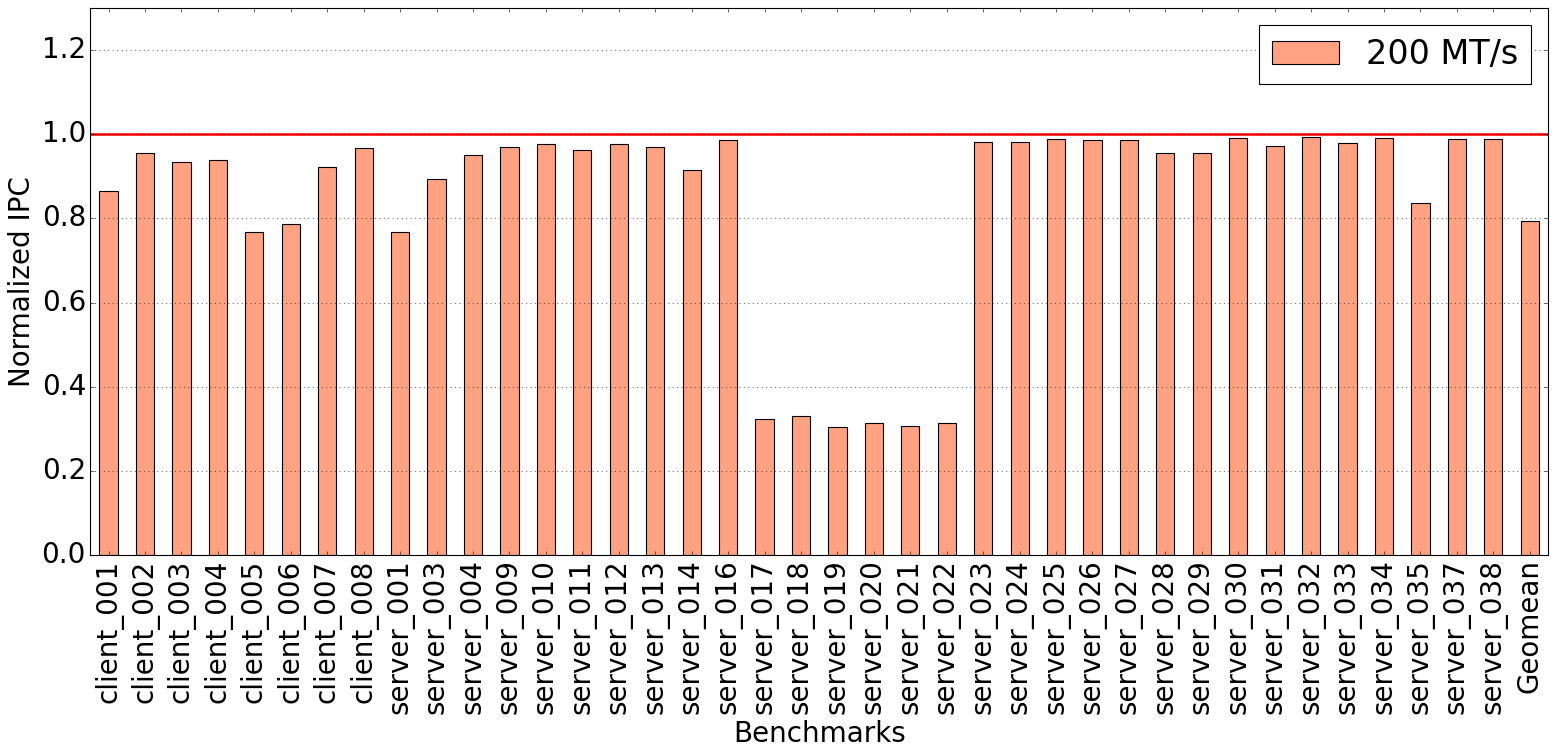

In [30]:
PARENT_DIR = './data/low_bandwidth_ipc/clientserver_ipcp/'
BANDWIDTH = '200'
baseline = pd.read_csv(PARENT_DIR + 'baseline.csv')
experiment = pd.read_csv(PARENT_DIR + BANDWIDTH + '.csv')
# print(experiment)
normalized_ipc = experiment.IPC/baseline.IPC 
df = pd.DataFrame(
    data=normalized_ipc.to_list(),
    index=baseline.Benchmarks,
    columns=[BANDWIDTH + ' MT/s']
)

df.loc['Geomean'] = [geomean(df, BANDWIDTH + ' MT/s')]

df.plot(kind='bar',color='#ffa282')

plt.axhline(y=1, c='r', linewidth=2.3)
plt.grid(axis='y')
plt.ylabel('Normalized IPC')
plt.ylim(0, 1.3)
plt.tight_layout()
# plt.legend().remove()
# plt.savefig(BANDWIDTH + '.png')

df.loc['Geomean']